**Detecting Autism Spectrum Disorder in Children with Computer Vision**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

sns.set_style("darkgrid")
pd.set_option("display.max_columns", None)   # setting to display all columns
pd.options.plotting.backend = "plotly"



In [ ]:
train_data=pd.read_csv('train.csv')
test_data=pd.read_csv('test.csv')

**Dataset Description**

|Feature | Description
|------|------------
| index | The participant’s ID number
|AX_Score|Score based on the Autism Spectrum Quotient (AQ) 10 item screening tool [AQ-10](https://docs.autismresearchcentre.com/tests/AQ10.pdf)
|age|Age in years
|gender| Male or Female
|ethnicity|Ethnicities in text form
|jaundice|Whether or not the participant was born with jaundice?
|autism|Whether or not anyone in tbe immediate family has been diagnosed with autism?
|country_of_res|Countries in text format
|used_app_before|Whether the participant has used a screening app
|result|Score from the AQ-10 screening tool
|age_desc|Age as categorical
|relation|Relation of person who completed the test
|Class/ASD|Participant classification


In [ ]:
train_data.head()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,gender,ethnicity,jaundice,austim,contry_of_res,used_app_before,result,age_desc,relation,Class/ASD
0,1,1,0,1,0,1,0,1,0,1,1,38.172746,f,?,no,no,Austria,no,6.351166,18 and more,Self,0
1,2,0,0,0,0,0,0,0,0,0,0,47.750517,m,?,no,no,India,no,2.255185,18 and more,Self,0
2,3,1,1,1,1,1,1,1,1,1,1,7.380373,m,White-European,no,yes,United States,no,14.851484,18 and more,Self,1
3,4,0,0,0,0,0,0,0,0,0,0,23.561927,f,?,no,no,United States,no,2.276617,18 and more,Self,0
4,5,0,0,0,0,0,0,0,0,0,0,43.205790,m,?,no,no,South Africa,no,-4.777286,18 and more,Self,0


In [ ]:
train_data.shape

(800, 22)

In [ ]:
pd.DataFrame(train_data.isnull().sum(), columns=["Missing Values"]).style.bar(color = "#84A9AC")

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/style.py:3851: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Missing Values
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
pd.DataFrame(train_data.isna().sum(),columns=["NaN Values"]).style.bar(color = "#84A9AC")

,NaN Values
ID,0
A1_Score,0
A2_Score,0
A3_Score,0
A4_Score,0
A5_Score,0
A6_Score,0
A7_Score,0
A8_Score,0
A9_Score,0


In [ ]:
train_data.describe()

,ID,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,age,result,Class/ASD
count,800.0000,800.000000,800.000000,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000
mean,400.5000,0.560000,0.530000,0.450000,0.41500,0.395000,0.303750,0.397500,0.508750,0.495000,0.617500,28.452118,8.537303,0.201250
std,231.0844,0.496697,0.499411,0.497805,0.49303,0.489157,0.460164,0.489687,0.500236,0.500288,0.486302,16.310966,4.807676,0.401185
min,1.0000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.718550,-6.137748,0.000000
25%,200.7500,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.198153,5.306575,0.000000
50%,400.5000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,24.848350,9.605299,0.000000
75%,600.2500,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35.865429,12.514484,0.000000
max,800.0000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.461718,15.853126,1.000000


In [ ]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               800 non-null    int64  
 1   A1_Score         800 non-null    int64  
 2   A2_Score         800 non-null    int64  
 3   A3_Score         800 non-null    int64  
 4   A4_Score         800 non-null    int64  
 5   A5_Score         800 non-null    int64  
 6   A6_Score         800 non-null    int64  
 7   A7_Score         800 non-null    int64  
 8   A8_Score         800 non-null    int64  
 9   A9_Score         800 non-null    int64  
 10  A10_Score        800 non-null    int64  
 11  age              800 non-null    float64
 12  gender           800 non-null    object 
 13  ethnicity        800 non-null    object 
 14  jaundice         800 non-null    object 
 15  austim           800 non-null    object 
 16  contry_of_res    800 non-null    object 
 17  used_app_before 

In [ ]:
train_data.dtypes

ID                   int64
A1_Score             int64
A2_Score             int64
A3_Score             int64
A4_Score             int64
A5_Score             int64
A6_Score             int64
A7_Score             int64
A8_Score             int64
A9_Score             int64
A10_Score            int64
age                float64
gender              object
ethnicity           object
jaundice            object
austim              object
contry_of_res       object
used_app_before     object
result             float64
age_desc            object
relation            object
Class/ASD            int64
dtype: object

In [ ]:
train_data["ethnicity"].unique()

array(['?', 'White-European', 'Middle Eastern ', 'Pasifika', 'Black',
       'Others', 'Hispanic', 'Asian', 'Turkish', 'South Asian', 'Latino',
       'others'], dtype=object)

In [ ]:
train_data["ethnicity"].value_counts()

ethnicity
White-European     257
?                  203
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Others              29
Latino              17
Hispanic             9
Turkish              5
others               3
Name: count, dtype: int64

In [ ]:
train_data['ethnicity'] = train_data['ethnicity'].replace('?', 'Others')
train_data['ethnicity'] = train_data['ethnicity'].replace('others', 'Others')

In [ ]:
train_data["ethnicity"].value_counts()

ethnicity
White-European     257
Others             235
Middle Eastern      97
Asian               67
Black               47
South Asian         34
Pasifika            32
Latino              17
Hispanic             9
Turkish              5
Name: count, dtype: int64

In [ ]:
train_data["jaundice"].value_counts()

jaundice
no     615
yes    185
Name: count, dtype: int64

In [ ]:
train_data["austim"].value_counts()

austim
no     669
yes    131
Name: count, dtype: int64

**Exploratory Data Analysis**

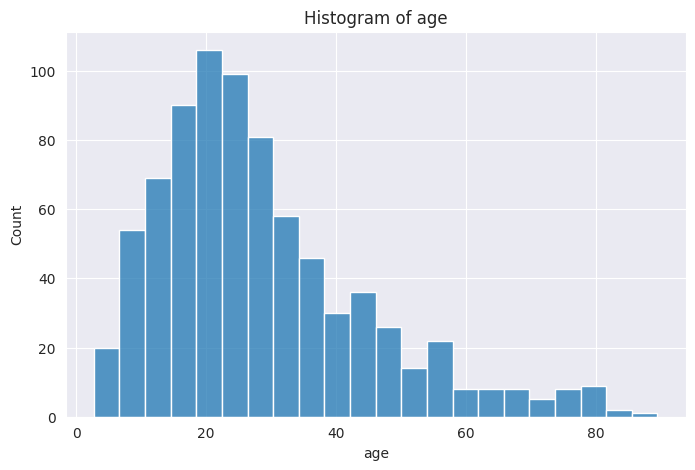

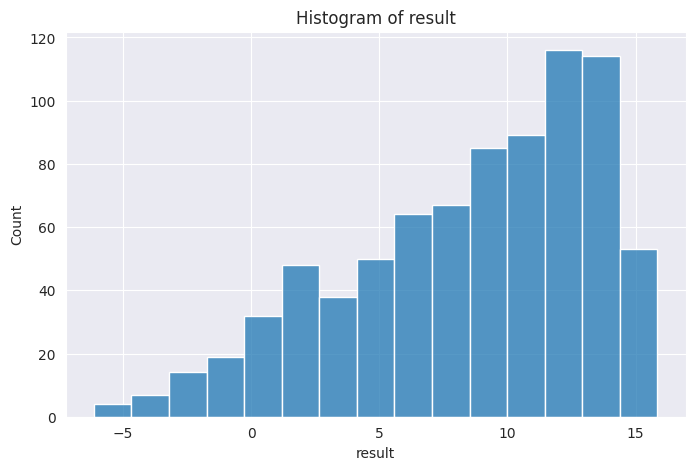

In [ ]:
# Histogram of numerical features
numerical_features = ['age', 'result']
for feature in numerical_features:
    plt.figure(figsize=(8, 5))
    sns.histplot(data=train_data, x=feature)
    plt.title(f'Histogram of {feature}')
    plt.show()

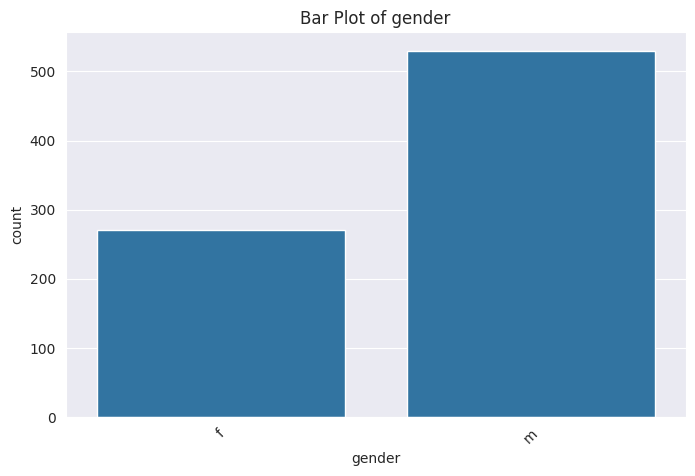

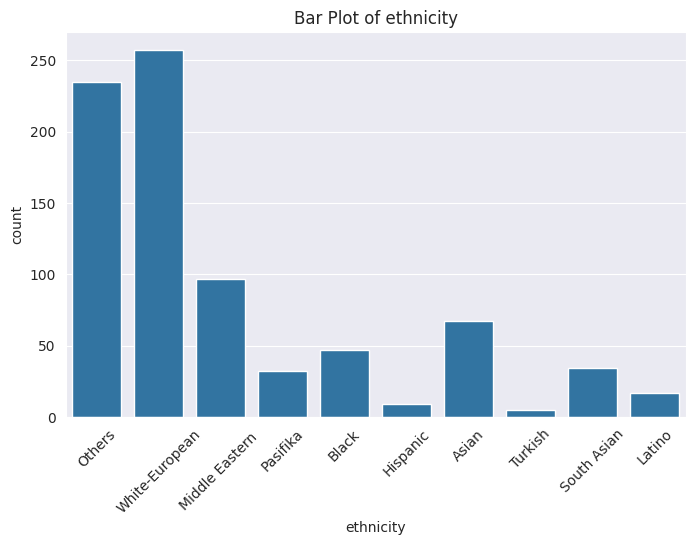

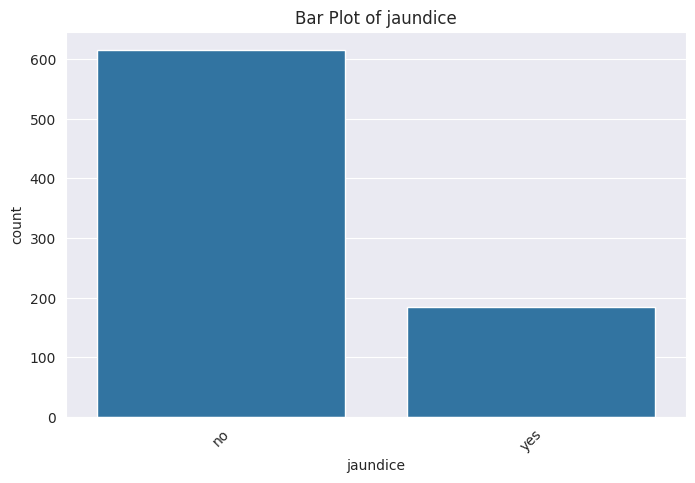

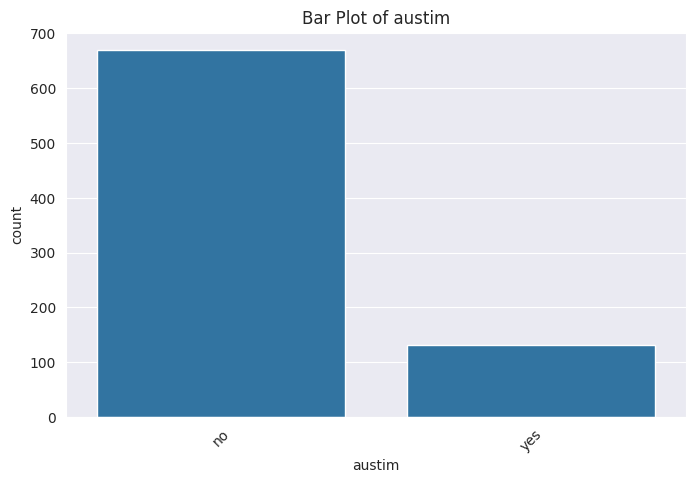

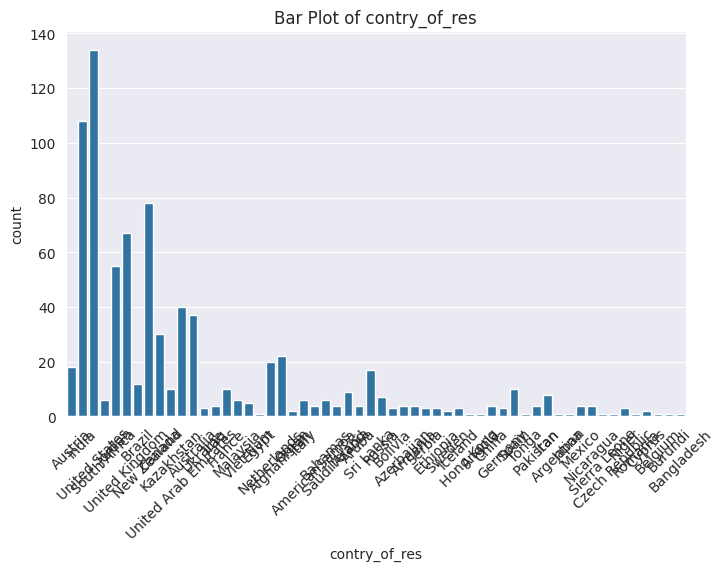

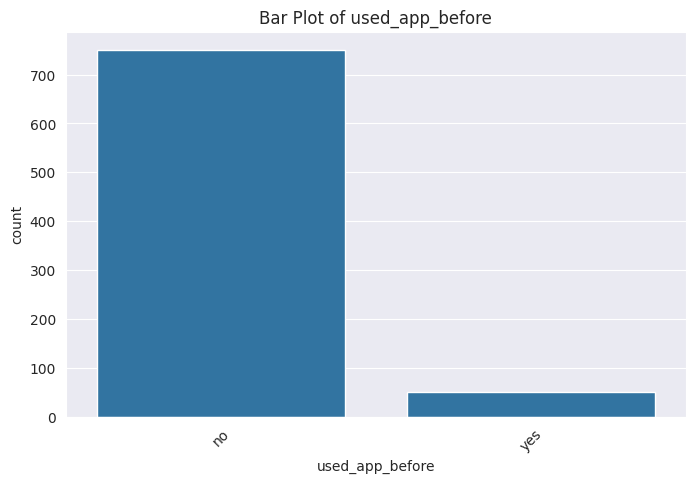

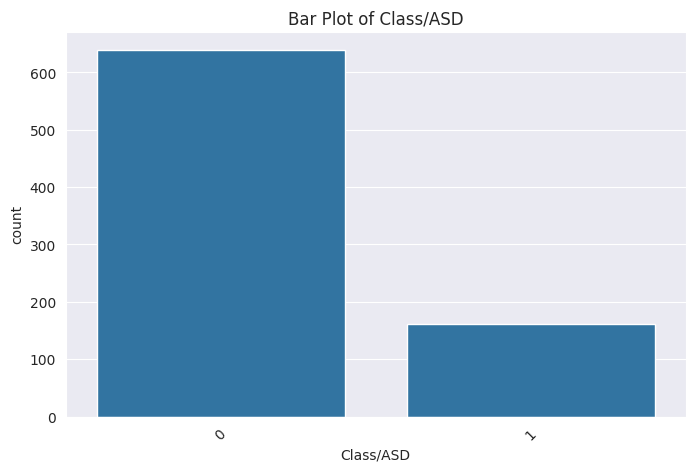

In [ ]:
# Bar plot of categorical features
categorical_features = ['gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'used_app_before', 'Class/ASD']
for feature in categorical_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(data=train_data, x=feature)
    plt.title(f'Bar Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()

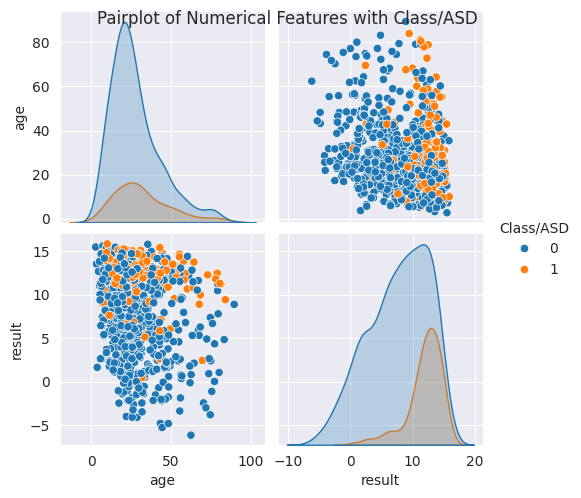

In [ ]:
# Pairplot of numerical features with hue as target variable
sns.pairplot(train_data, vars=numerical_features, hue='Class/ASD', diag_kind='kde')
plt.suptitle('Pairplot of Numerical Features with Class/ASD')
plt.show()

In [ ]:
import plotly.express as px

# Assuming 'train_data' is your DataFrame
colors = ['black', 'purple']

# Grouping data to get counts
autism_counts = train_data['Class/ASD'].value_counts().reset_index()
autism_counts.columns = ['Class/ASD', 'Count']

# Plotting donut chart
fig = px.pie(autism_counts, names='Class/ASD', values='Count', hole=0.7, color_discrete_sequence=colors,
             title='TOTAL AUTISM SPECTRUM DISORDER (ASD) %')

fig.show()

In [ ]:
fig = px.histogram(train_data, x="gender",
                   template='plotly_dark',
                   color_discrete_sequence = ["#84A9AC"])

fig.update_layout(title = "<b>Counts of Male and Female</b>",
                  title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)

fig.show()

In [ ]:
fig = px.pie(train_data, names = "Class/ASD",
             title = "<b>Autism Spectrum Disorder Counts</b>",
             template = "plotly_dark")

fig.update_traces(textposition='inside',
                  textinfo = 'percent+label',
                  marker = dict(line = dict(color = '#000000', width = 1.5)))

fig.update_layout(title_x = 0.5,
                  title_font = dict(size = 20),
                  uniformtext_minsize = 15)


fig.show()

In [ ]:
train_data.columns

Index(['ID', 'A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score',
       'A6_Score', 'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age',
       'gender', 'ethnicity', 'jaundice', 'austim', 'contry_of_res',
       'used_app_before', 'result', 'age_desc', 'relation', 'Class/ASD'],
      dtype='object')

In [ ]:
train_data.drop(columns=['relation','ID','age_desc','used_app_before'], inplace=True)


In [ ]:
train_data.columns

Index(['A1_Score', 'A2_Score', 'A3_Score', 'A4_Score', 'A5_Score', 'A6_Score',
       'A7_Score', 'A8_Score', 'A9_Score', 'A10_Score', 'age', 'gender',
       'ethnicity', 'jaundice', 'austim', 'contry_of_res', 'result',
       'Class/ASD'],
      dtype='object')

In [ ]:
train_data.dtypes

A1_Score           int64
A2_Score           int64
A3_Score           int64
A4_Score           int64
A5_Score           int64
A6_Score           int64
A7_Score           int64
A8_Score           int64
A9_Score           int64
A10_Score          int64
age              float64
gender            object
ethnicity         object
jaundice          object
austim            object
contry_of_res     object
result           float64
Class/ASD          int64
dtype: object

In [ ]:
categorical_columns = train_data.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(train_data[categorical_columns])

#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
final_data = pd.concat([train_data, one_hot_df], axis=1)

# Drop the original categorical columns
final_data = final_data.drop(categorical_columns, axis=1)

# Display the resulting dataframe
print(f"Encoded Employee data : \n{final_data}")

Encoded Employee data : 
     A1_Score  A2_Score  A3_Score  A4_Score  A5_Score  A6_Score  A7_Score  \
0           1         0         1         0         1         0         1   
1           0         0         0         0         0         0         0   
2           1         1         1         1         1         1         1   
3           0         0         0         0         0         0         0   
4           0         0         0         0         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
795         0         1         0         0         0         0         0   
796         0         1         1         0         0         1         0   
797         0         0         0         0         0         0         0   
798         0         0         0         0         0         0         0   
799         0         1         0         0         0         0         0   

     A8_Score  A9_Score  A10_Score        age     

In [ ]:
X=final_data.drop('Class/ASD',axis=1)
Y=final_data['Class/ASD']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25)

In [ ]:
print(f"Shape of X_train is: {X_train.shape}")
print(f"Shape of Y_train is: {Y_train.shape}\n")
print(f"Shape of X_test is: {X_test.shape}")
print(f"Shape of Y_test is: {Y_test.shape}")

Shape of X_train is: (600, 84)
Shape of Y_train is: (600,)

Shape of X_test is: (200, 84)
Shape of Y_test is: (200,)


In [ ]:
input_dim = X.shape[1]

In [ ]:
model = Sequential()
model.add(Dense(8, input_dim = input_dim, kernel_initializer='normal', activation='relu'))
model.add(Dense(5, activation = "relu", kernel_initializer='normal'))
model.add(Dense(2, activation = 'sigmoid'))

In [ ]:
# compiling model
model.compile(optimizer = Adam(learning_rate = 0.001),
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8)                 680       
                                                                 
 dense_1 (Dense)             (None, 5)                 45        
                                                                 
 dense_2 (Dense)             (None, 2)                 12        
                                                                 
Total params: 737 (2.88 KB)
Trainable params: 737 (2.88 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


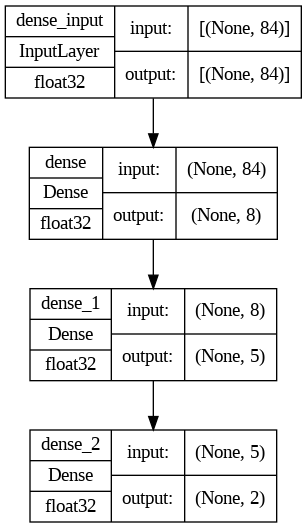

In [ ]:
plot_model(model,
           show_dtype = True,
           show_layer_names = True,
           show_shapes = True)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Replace X_train, X_test, y_train, y_test with your actual data

# Initialize the Logistic Regression model
lr_model = LogisticRegression()

# Train the model
lr_model.fit(X_train, Y_train)

# Make predictions on the testing set
y_pred = lr_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       167
           1       0.61      0.67      0.64        33

    accuracy                           0.88       200
   macro avg       0.77      0.79      0.78       200
weighted avg       0.88      0.88      0.88       200



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, Y_train)
y_pred = rf_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))



Accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       167
           1       0.60      0.64      0.62        33

    accuracy                           0.87       200
   macro avg       0.76      0.78      0.77       200
weighted avg       0.87      0.87      0.87       200



In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

gbm_model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gbm_model.fit(X_train, Y_train)
y_pred = gbm_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.875
Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.92      0.92       167
           1       0.61      0.67      0.64        33

    accuracy                           0.88       200
   macro avg       0.77      0.79      0.78       200
weighted avg       0.88      0.88      0.88       200



In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

svc_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
svc_model.fit(X_train, Y_train)
y_pred = svc_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.835
Classification Report:
              precision    recall  f1-score   support

           0       0.83      1.00      0.91       167
           1       0.00      0.00      0.00        33

    accuracy                           0.83       200
   macro avg       0.42      0.50      0.46       200
weighted avg       0.70      0.83      0.76       200



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, Y_train)
y_pred = knn_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.855
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91       167
           1       0.57      0.52      0.54        33

    accuracy                           0.85       200
   macro avg       0.74      0.72      0.73       200
weighted avg       0.85      0.85      0.85       200



In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

mlp_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=1000, random_state=42)
mlp_model.fit(X_train, Y_train)
y_pred = mlp_model.predict(X_test)

accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)
print("Classification Report:")
print(classification_report(Y_test, y_pred))


Accuracy: 0.84
Classification Report:
              precision    recall  f1-score   support

           0       0.91      0.90      0.90       167
           1       0.51      0.55      0.53        33

    accuracy                           0.84       200
   macro avg       0.71      0.72      0.72       200
weighted avg       0.84      0.84      0.84       200



In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the base models and their predictions
base_models = [
    ('lr', lr_model),
    ('rf', rf_model),
    ('gb', gbm_model),
    ('svc', svc_model),
    ('knn', knn_model),
    ('mlp', mlp_model)
]

# Extract predictions from base models
X_train_pred = np.column_stack([model.predict(X_train) for _, model in base_models])
X_test_pred = np.column_stack([model.predict(X_test) for _, model in base_models])

# Initialize the meta-model (final estimator)
meta_model = LogisticRegression()

# Initialize the StackingClassifier with base models and meta-model
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Train the StackingClassifier on the training data
stacking_clf.fit(X_train_pred, Y_train)

# Make predictions on the testing set using stacked predictions
y_pred = stacking_clf.predict(X_test_pred)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.875


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning:


15 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
15 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1162, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 54, in _check_solver
    raise ValueError(
ValueError: Solv

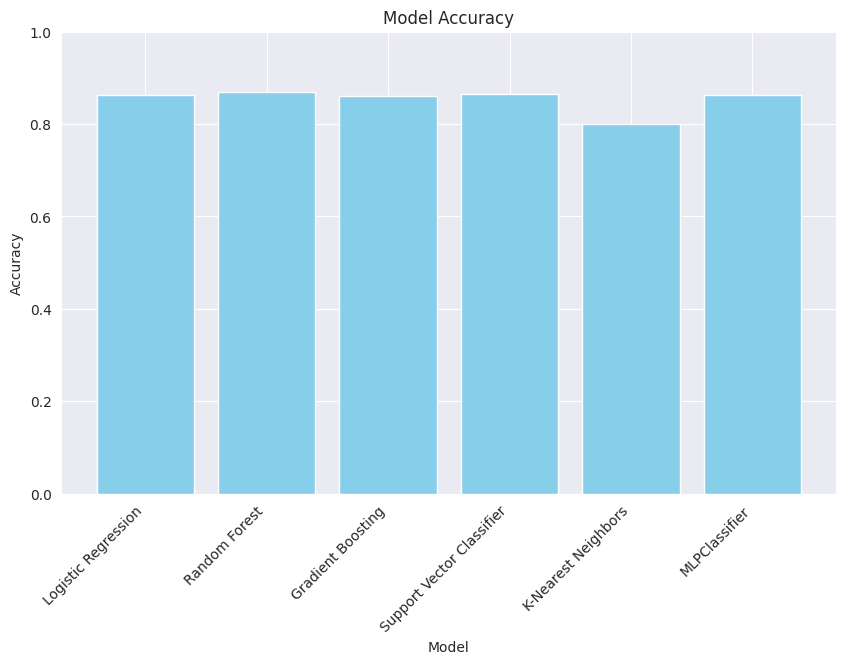

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

# Define hyperparameter grids for each model
lr_param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2']}
rf_param_grid = {'n_estimators': [50, 100, 200], 'max_depth': [None, 10, 20]}
gbm_param_grid = {'n_estimators': [50, 100, 200], 'learning_rate': [0.05, 0.1, 0.2]}
svc_param_grid = {'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']}
knn_param_grid = {'n_neighbors': [3, 5, 7], 'weights': ['uniform', 'distance']}
mlp_param_grid = {'hidden_layer_sizes': [(50,), (100,), (200,)], 'alpha': [0.0001, 0.001, 0.01]}

# Define a dictionary of models and their corresponding hyperparameter grids
models = {
    'Logistic Regression': (LogisticRegression(), lr_param_grid),
    'Random Forest': (RandomForestClassifier(), rf_param_grid),
    'Gradient Boosting': (GradientBoostingClassifier(), gbm_param_grid),
    'Support Vector Classifier': (SVC(), svc_param_grid),
    'K-Nearest Neighbors': (KNeighborsClassifier(), knn_param_grid),
    'MLPClassifier': (MLPClassifier(), mlp_param_grid)
}

# Perform GridSearchCV for each model
best_scores = {}
for model_name, (model, param_grid) in models.items():
    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, Y_train)
    best_scores[model_name] = grid_search.best_score_

# Plot the accuracy for each model
plt.figure(figsize=(10, 6))
plt.bar(best_scores.keys(), best_scores.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1)
plt.show()


**Voting Classifier:the best hyperparameters for each individual model, we use ensemble methods to combine the predictions of these model**

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score

# Define the individual models with their best hyperparameters
lr_model = LogisticRegression(C=0.1, penalty='l2')
rf_model = RandomForestClassifier(max_depth=10, n_estimators=50)
gbm_model = GradientBoostingClassifier(learning_rate=0.05, n_estimators=50)
svc_model = SVC(C=0.1, kernel='linear')
knn_model = KNeighborsClassifier(n_neighbors=3, weights='uniform')
mlp_model = MLPClassifier(alpha=0.001, hidden_layer_sizes=(100,))

# Initialize the VotingClassifier
voting_clf = VotingClassifier(estimators=[
    ('lr', lr_model), ('rf', rf_model), ('gbm', gbm_model),
    ('svc', svc_model), ('knn', knn_model), ('mlp', mlp_model)],
    voting='hard')

# Train the VotingClassifier
voting_clf.fit(X_train, Y_train)

# Make predictions
y_pred = voting_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Voting Classifier Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



Voting Classifier Accuracy: 0.885


**Stacking Classifier: With best hyperparameters for each individual model , create ensemble methods to combine the predictions of these models.**

In [ ]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Define the base models with their best hyperparameters
base_models = [
    ('lr', lr_model), ('rf', rf_model), ('gbm', gbm_model),
    ('svc', svc_model), ('knn', knn_model), ('mlp', mlp_model)
]

# Initialize the StackingClassifier with the best hyperparameters
stacking_clf = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

# Train the StackingClassifier
stacking_clf.fit(X_train, Y_train)

# Make predictions
y_pred = stacking_clf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(Y_test, y_pred)
print("Stacking Classifier Accuracy:", accuracy)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preproc

Stacking Classifier Accuracy: 0.88


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.



**IMAGES**

**CONVOLUTIONAL NEURAL NETWORK**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

# Function to load and preprocess images
def preprocess_images(folder_path, image_size=(150, 150)):
    images = []
    labels = []
    for label, category in enumerate(['Non_Autistic', 'Autistic']):
        category_folder = os.path.join(folder_path, category)
        for image_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.astype('float32') / 255.0  # Normalizing pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/HF-Project/images"

# Preprocess images
images, labels = preprocess_images(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Define the CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 neurons for binary classification

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on test data and display true and predicted labels
class_labels = ['Non_Autistic', 'Autistic']

num_images_to_display = 10
for i in range(num_images_to_display):
    test_image = X_test[i]
    true_label = class_labels[np.argmax(y_test[i])]
    predicted_label = class_labels[np.argmax(model.predict(np.expand_dims(test_image, axis=0)))]

    plt.imshow(test_image)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()


In [ ]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred, target_names=['Non_Autistic', 'Autistic']))

**RESNET50 (TRANSFER LEARNING)**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.applications import ResNet50
from keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# Function to load and preprocess images
def preprocess_images(folder_path, image_size=(224, 224)):
    images = []
    labels = []
    for label, category in enumerate(['Non_Autistic', 'Autistic']):
        category_folder = os.path.join(folder_path, category)
        for image_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.astype('float32') / 255.0  # Normalizing pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/HF-Project/images"

# Preprocess images
images, labels = preprocess_images(folder_path)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Load pre-trained ResNet50 model without top layers
resnet_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

# Freeze the layers in the pre-trained model
for layer in resnet_model.layers:
    layer.trainable = False

# Add custom top layers for binary classification
model = Sequential()
model.add(resnet_model)
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dense(2, activation='softmax'))  # Output layer with 2 neurons for binary classification

# Compile the model
model.compile(optimizer=Adam(lr=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

# Predict on test data
y_pred = np.argmax(model.predict(X_test), axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true, y_pred, target_names=['Non_Autistic', 'Autistic']))

# Predict on test data and display true and predicted labels
class_labels = ['Non_Autistic', 'Autistic']

num_images_to_display = 10
for i in range(num_images_to_display):
    test_image = X_test[i]
    true_label = class_labels[np.argmax(y_test[i])]
    predicted_label = class_labels[np.argmax(model.predict(np.expand_dims(test_image, axis=0)))]

    plt.imshow(test_image)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()


**RESNEXT**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def squeeze_excite_block(input_tensor, ratio=16):
    """
    Squeeze-and-Excitation block
    """
    filters = input_tensor.shape[-1]

    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape((1, 1, filters))(se)
    se = layers.Dense(filters // ratio, activation='relu', kernel_initializer='he_normal')(se)
    se = layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal')(se)

    return layers.multiply([input_tensor, se])

def ResNeXt(input_shape=(224, 224, 3), num_classes=2):
    """
    ResNeXt Network with ResNet101 base
    """
    # Load pre-trained ResNet101 model (excluding top layers)
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=input_shape)

    # Squeeze-and-Excitation blocks
    se1 = squeeze_excite_block(base_model.layers[-64].output)  # Adjust based on the ResNet101 architecture
    se2 = squeeze_excite_block(base_model.layers[-66].output)  # Adjust based on the ResNet101 architecture

    # Top layers for classification
    x = layers.GlobalAveragePooling2D()(se2)
    x = layers.Dense(128, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Combine base model and top layers
    model = models.Model(inputs=base_model.input, outputs=predictions)

    return model

# Function to load and preprocess images
def preprocess_images(folder_path, image_size=(224, 224)):
    images = []
    labels = []
    for label, category in enumerate(['Non_Autistic', 'Autistic']):
        category_folder = os.path.join(folder_path, category)
        for image_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.astype('float32') / 255.0  # Normalizing pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/HF-Project/images"

# Preprocess images
images, labels = preprocess_images(folder_path)

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Create ResNeXt model
model_resnext = ResNeXt()

# Compile the model
model_resnext.compile(optimizer=Adam(lr=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_resnext.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model_resnext.evaluate(X_test, y_test)
print("Testing Accuracy:", accuracy)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predict on test data
y_pred = model_resnext.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=['Non_Autistic', 'Autistic']))

class_labels = ['Non_Autistic', 'Autistic']

num_images_to_display = 10
for i in range(num_images_to_display):
    test_image = X_test[i]
    true_label = class_labels[np.argmax(y_test[i])]
    predicted_label = class_labels[np.argmax(model_resnext.predict(np.expand_dims(test_image, axis=0)))]

    plt.imshow(test_image)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()



**SENET**

In [ ]:
import os
import numpy as np
import cv2
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from tensorflow.keras.applications import ResNet101
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

def squeeze_excite_block(input_tensor, ratio=16):
    """
    Squeeze-and-Excitation block
    """
    filters = input_tensor.shape[-1]

    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape((1, 1, filters))(se)
    se = layers.Dense(filters // ratio, activation='relu', kernel_initializer='he_normal')(se)
    se = layers.Dense(filters, activation='sigmoid', kernel_initializer='he_normal')(se)

    return layers.multiply([input_tensor, se])

def SENet(input_shape=(224, 224, 3), num_classes=2):
    """
    Squeeze-and-Excitation Network with ResNet101 base
    """
    # Load pre-trained ResNet101 model (excluding top layers)
    base_model = ResNet101(weights='imagenet', include_top=False, input_shape=input_shape)

    # Squeeze-and-Excitation blocks
    se1 = squeeze_excite_block(base_model.layers[-64].output)  # Adjust based on the ResNet101 architecture
    se2 = squeeze_excite_block(base_model.layers[-66].output)  # Adjust based on the ResNet101 architecture

    # Top layers for classification
    x = layers.GlobalAveragePooling2D()(se2)
    x = layers.Dense(128, activation='relu')(x)
    predictions = layers.Dense(num_classes, activation='softmax')(x)

    # Combine base model and top layers
    model = models.Model(inputs=base_model.input, outputs=predictions)

    return model

# Function to load and preprocess images
def preprocess_images(folder_path, image_size=(224, 224)):
    images = []
    labels = []
    for label, category in enumerate(['Non_Autistic', 'Autistic']):
        category_folder = os.path.join(folder_path, category)
        for image_name in os.listdir(category_folder):
            image_path = os.path.join(category_folder, image_name)
            image = cv2.imread(image_path)
            image = cv2.resize(image, image_size)
            image = image.astype('float32') / 255.0  # Normalizing pixel values
            images.append(image)
            labels.append(label)
    return np.array(images), np.array(labels)

# Path to the folder containing images
folder_path = "/content/drive/MyDrive/HF-Project/images"

# Preprocess images
images, labels = preprocess_images(folder_path)

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(images, labels, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Convert labels to one-hot encoding
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
y_test = to_categorical(y_test)

# Create SENet model
model_senet = SENet()

# Compile the model
model_senet.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model_senet.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model
loss, accuracy = model_senet.evaluate(X_test, y_test)
print("Testing Accuracy:", accuracy)

# Plot training and validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Plot training and validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()
plt.show()

# Predict on test data
y_pred = model_senet.predict(X_test)
y_pred_labels = np.argmax(y_pred, axis=1)
y_true_labels = np.argmax(y_test, axis=1)

# Generate classification report
print(classification_report(y_true_labels, y_pred_labels, target_names=['Non_Autistic', 'Autistic']))
# Predict on test data and display true and predicted labels
class_labels = ['Non_Autistic', 'Autistic']

num_images_to_display = 10
for i in range(num_images_to_display):
    test_image = X_test[i]
    true_label = class_labels[np.argmax(y_test[i])]
    predicted_label = class_labels[np.argmax(model_senet.predict(np.expand_dims(test_image, axis=0)))]

    plt.imshow(test_image)
    plt.title(f"True Label: {true_label}, Predicted Label: {predicted_label}")
    plt.axis('off')
    plt.show()
